In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


In [2]:
df = pd.read_csv("SuperMarket Analysis.csv")
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

np.int64(0)

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

df['Hour'] = pd.to_datetime(df['Time'], format='mixed').dt.hour


In [14]:
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()
daily_sales.head()


,Date,Sales
0,2019-01-01,4745.1810
1,2019-01-02,1945.5030
2,2019-01-03,2078.1285
3,2019-01-04,1623.6885
4,2019-01-05,3536.6835


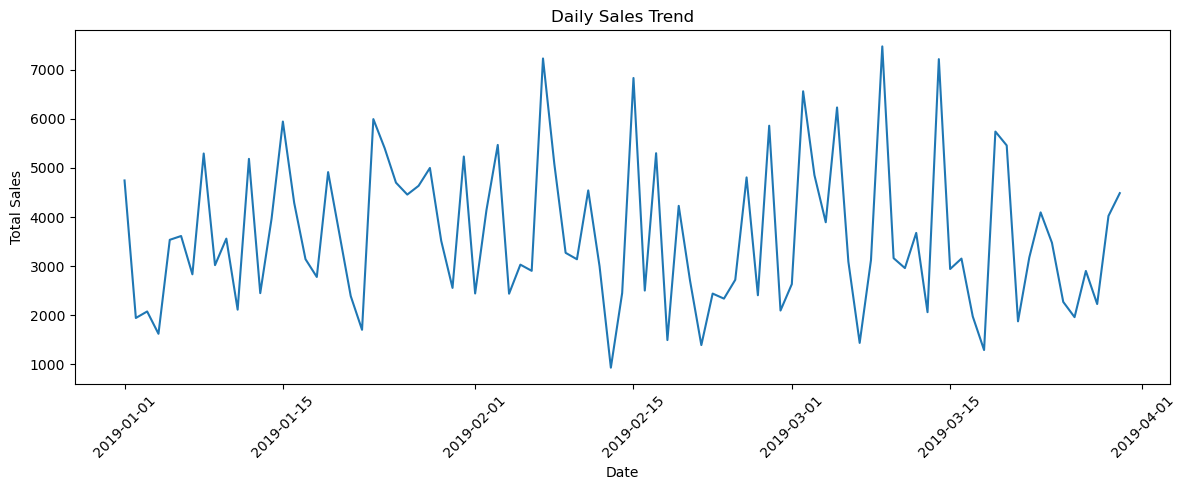

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(daily_sales['Date'], daily_sales['Sales'])
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Business Insights – Daily Sales Trends
- Daily sales exhibit noticeable fluctuations, indicating varying customer demand across different days.
- Certain days show higher sales peaks, suggesting potential opportunities for targeted promotions or special offers.
- Sales patterns indicate the importance of demand forecasting to manage inventory efficiently.


In [17]:
product_sales = (
    df.groupby('Product line')['Sales']
    .sum()
    .sort_values(ascending=False)
)

product_sales


Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Sales, dtype: float64

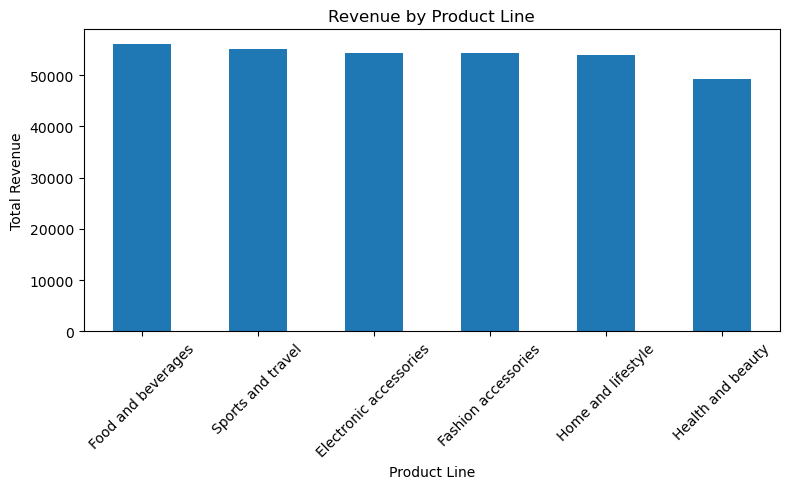

In [18]:
plt.figure(figsize=(8,5))
product_sales.plot(kind='bar')
plt.title("Revenue by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Business Insights – Product Line Performance
- A limited number of product lines contribute a significant portion of total sales revenue.
- High-performing product categories should be prioritized for inventory stocking and marketing efforts.
- Underperforming product lines may require promotional strategies or reassessment.


In [19]:
customer_sales = df.groupby('Customer type')['Sales'].mean()
customer_sales


Customer type
Member    335.742945
Normal    306.372379
Name: Sales, dtype: float64

#### Business Insights – Customer Behavior
- Member customers show a higher average transaction value compared to normal customers.
- This indicates that loyalty programs positively influence customer spending behavior.
- Strengthening membership benefits may further increase customer retention and revenue.


In [20]:
hourly_sales = df.groupby('Hour')['Sales'].mean()
hourly_sales


Hour
10    311.103772
11    337.525883
12    292.875084
13    337.118709
14    371.426494
15    305.681456
16    327.614591
17    330.340784
18    279.896129
19    351.323124
20    306.260360
Name: Sales, dtype: float64

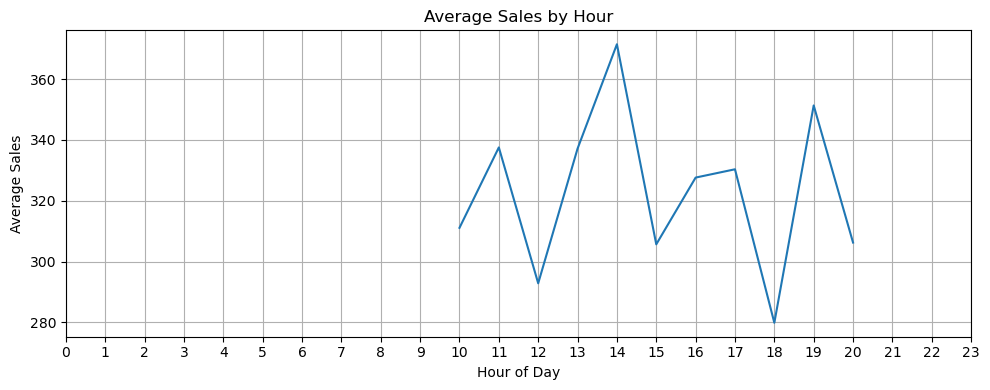

In [21]:
plt.figure(figsize=(10,4))
plt.plot(hourly_sales.index, hourly_sales.values)
plt.title("Average Sales by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Sales")
plt.xticks(range(0,24))
plt.grid(True)
plt.tight_layout()
plt.show()


#### Business Insights – Time-Based Sales Patterns
- Sales peak during specific hours of the day, highlighting key business hours.
- These peak periods are ideal for staffing optimization and promotional activities.
- Lower sales during off-peak hours suggest opportunities for time-based discounts.


In [22]:
df['Sales'].describe()
df[['Quantity', 'Sales']].corr()


,Quantity,Sales
Quantity,1.00000,0.70551
Sales,0.70551,1.00000


#### Business Insights – Statistical Analysis
- The sales data shows moderate variability, indicating consistent purchasing behavior with occasional high-value transactions.
- A positive correlation between quantity and sales confirms that higher item purchases directly increase revenue.
- Understanding these statistical relationships supports data-driven pricing and sales strategies.


## Executive Summary
This project analyzes supermarket sales data to identify revenue trends, product performance, and customer purchasing behavior. Through data cleaning, exploratory analysis, and visualization, key insights were extracted to support data-driven retail decision-making. The analysis highlights peak sales periods, high-performing product categories, and the positive impact of customer membership programs, leading to actionable recommendations for operational and marketing optimization.
